---
# **Mobile Price Prediction**
---

## About Dataset:

- Phone Name is the name of the phone that is extracted.
- Rating is what it gets out of 5 stars.
- Number of Ratings is the Total number of people those rates this product.
- Ram size
- Rom is the Storage that the product has.
- Front and Rare Camera in the Mega Pixels.
- Battery size and processor of different types.
- Lastly the price of the phone in Indian Rupees.

## Importing dependencies

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Importing Data

In [2]:
df=pd.read_csv('mobile_prices_2023.csv')
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17


In [3]:
df.drop(axis=1,columns='Date of Scraping',inplace=True)
# df.drop(axis=1,columns='Phone Name',inplace=True)

## Checking For Missing Values

In [4]:
df.isna().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
dtype: int64

### Replacing missing value

In [5]:
df_filled = df.fillna(df.mode())
df=df_filled.copy()

In [6]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
dtype: int64

# **Feature Extraction**

#### Price Extraction from column Price in INR

In [7]:
main_label = 'Price in INR'
def replace_rupee(y):
    if '₹' in str(y):
        return int(y[1:].replace(',',''))
    else:
        return int(y)
df[main_label] = df[main_label].apply(replace_rupee)
df['Price in INR'] = df['Price in INR'].astype(float)
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649.0
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999.0


#### Extracting Company Name

In [8]:
# Extracting company names from the 'Phone Name' column
df['Company_Name'] = df['Phone Name'].apply(lambda x: x.split('(')[0].strip().split()[0])
# Display the DataFrame with extracted company names
df[[ 'Company_Name']].head(2)

,Company_Name
0,POCO
1,POCO


#### Feature engenerring of Processor

In [9]:
# Extracting company names from the 'Processor' column
df['Processor_Name'] = df['Processor'].apply(lambda x: str(x).split('(')[0].strip().split()[0] if isinstance(x, str) else x)
# Display the DataFrame with extracted company names
df[['Processor_Name']].head(2)

,Processor_Name
0,Mediatek
1,Mediatek


#### Feature engenerring of Battery

In [10]:
# Extracting battery sizes from the 'Battery' column
df['Battery_Size'] = df['Battery'].apply(lambda x: str(x).split('(')[0].strip().split()[0] if isinstance(x, str) else x)
# Display the DataFrame with extracted battery sizes
df[['Battery_Size']].head(2)

,Battery_Size
0,5000
1,5000


#### Feature engenerring of Front Camera

In [11]:
import re
# Extracting numbers from the 'Front Camera' column, handling NaN and non-string values
df['Front_Camera_Number'] = df['Front Camera'].apply(lambda x: re.search(r'\d+', str(x)).group() if pd.notna(x) and re.search(r'\d+', str(x)) else None)
# Display the DataFrame with extracted numbers
print(df[['Front_Camera_Number']].head(2))


  Front_Camera_Number
0                   5
1                   8


#### Feature engenerring of Back/Rare Camera

In [12]:
import re
# Extracting numbers from the 'Back/Rare Camera' column
df['Back/Rare_Camera_Sum'] = df['Back/Rare Camera'].apply(lambda x: sum(map(int, re.findall(r'\d+', str(x)))) if re.findall(r'\d+', str(x)) else None)
# Display the DataFrame with extracted sums
print(df[['Back/Rare_Camera_Sum']].head(2))


   Back/Rare_Camera_Sum
0                   8.0
1                  52.0


#### Feature engenerring of RAM,ROM/Storage

In [13]:
# Extracting RAM size from the 'RAM' column
df['RAM_Size'] = df['RAM'].apply(lambda x: x.split('(')[0].strip().split()[0] if isinstance(x, str) else None)
# Extracting ROM/Storage size from the 'ROM/Storage' column
df['ROM/Storage_Size'] = df['ROM/Storage'].apply(lambda x: x.split('(')[0].strip().split()[0] if isinstance(x, str) else None)
# Display the DataFrame with extracted RAM and ROM/Storage sizes
print(df[['RAM_Size', 'ROM/Storage_Size']].head(2))


  RAM_Size ROM/Storage_Size
0        2               32
1        4               64


#### Feature Engeneering of Ratings

In [14]:
# Convert 'Number of Ratings' to strings, remove commas, and then convert to float
df['Number of Ratings'] = df['Number of Ratings'].astype(str).str.replace(',', '').astype(float)
# Multiply two columns and create a new column
df['Total Ratings'] = df['Number of Ratings'] * df['Rating ?/5']

### Dropping Garbage variables

In [15]:
df.drop(['Back/Rare Camera','Number of Ratings','ROM/Storage','RAM', 'Front Camera', 'Battery', 'Processor', 'Phone Name'], axis=1, inplace=True)

## EDA

<Axes: ylabel='Rating ?/5'>

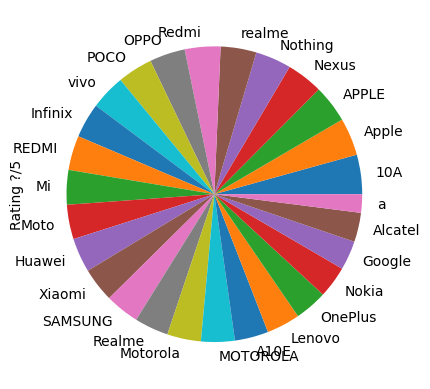

In [16]:
df.groupby('Company_Name')['Rating ?/5'].mean().sort_values(ascending=False).plot(kind='pie')


In [17]:
df.groupby('Company_Name')['Price in INR'].mean().sort_values(ascending=False)

Company_Name
APPLE       82085.343284
Apple       64447.700000
Google      54499.058824
Nexus       41998.666667
OnePlus     35447.591667
Nothing     33299.000000
Xiaomi      31497.071429
Huawei      24222.272727
vivo        23982.888889
SAMSUNG     22907.966667
Mi          22520.755556
OPPO        18625.800000
MOTOROLA    17913.064103
POCO        17511.191667
REDMI       15810.916667
realme      15277.682403
Moto        13061.250000
Redmi       12352.471154
Lenovo      12082.625000
Infinix     11494.833333
10A          9999.000000
�9A          9499.000000
Alcatel      7385.625000
Realme       5834.714286
Nokia        5562.145833
Motorola     1690.666667
a            1325.000000
A10E         1299.000000
Name: Price in INR, dtype: float64

In [18]:
df.groupby('Company_Name')['Total Ratings'].mean().sort_values(ascending=False)


Company_Name
Redmi       893467.437500
Moto        655484.525000
POCO        544610.718333
Apple       510058.940000
Lenovo      401240.541667
Realme      316651.228571
APPLE       299779.290299
realme      280203.916309
Nothing     194752.280000
Mi          125893.946667
Infinix     118118.491667
SAMSUNG     101167.218750
MOTOROLA     96710.870513
vivo         80836.965278
OPPO         75167.281667
Nokia        46401.529167
Xiaomi       38478.685714
Google       34045.852941
Motorola     15233.400000
REDMI        15188.600000
Nexus        13973.166667
OnePlus      11124.308333
Huawei        2037.754545
Alcatel       1558.333333
A10E          1037.300000
10A             28.800000
a                9.000000
�9A              0.000000
Name: Total Ratings, dtype: float64

<Axes: ylabel='Total Ratings'>

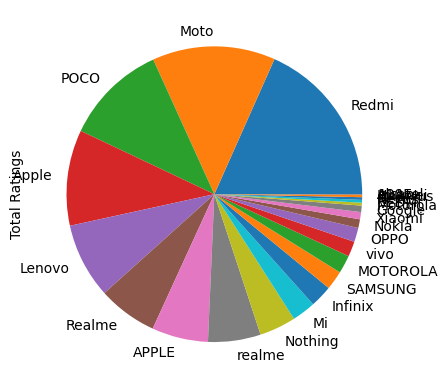

In [19]:
df.groupby('Company_Name')['Total Ratings'].mean().sort_values(ascending=False).plot(kind='pie')


## Converting into numeric variables

In [20]:
# List of columns to convert to float
columns_to_convert = ['Rating ?/5', 'Price in INR', 'Front_Camera_Number', 'Back/Rare_Camera_Sum',  'Total Ratings']
# Convert selected columns to float
for i in columns_to_convert:
    df[i] = df[i].astype(float)

In [21]:
df.dtypes

Rating ?/5              float64
Price in INR            float64
Company_Name             object
Processor_Name           object
Battery_Size             object
Front_Camera_Number     float64
Back/Rare_Camera_Sum    float64
RAM_Size                 object
ROM/Storage_Size         object
Total Ratings           float64
dtype: object

## Lable encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to each categorical column and remove the original column
for column in categorical_columns:
    df[column + '_Encoded'] = label_encoder.fit_transform(df[column])
    df = df.drop(column, axis=1)

In [23]:
df.columns

Index(['Rating ?/5', 'Price in INR', 'Front_Camera_Number',
       'Back/Rare_Camera_Sum', 'Total Ratings', 'Company_Name_Encoded',
       'Processor_Name_Encoded', 'Battery_Size_Encoded', 'RAM_Size_Encoded',
       'ROM/Storage_Size_Encoded'],
      dtype='object')

# Data Visualisation

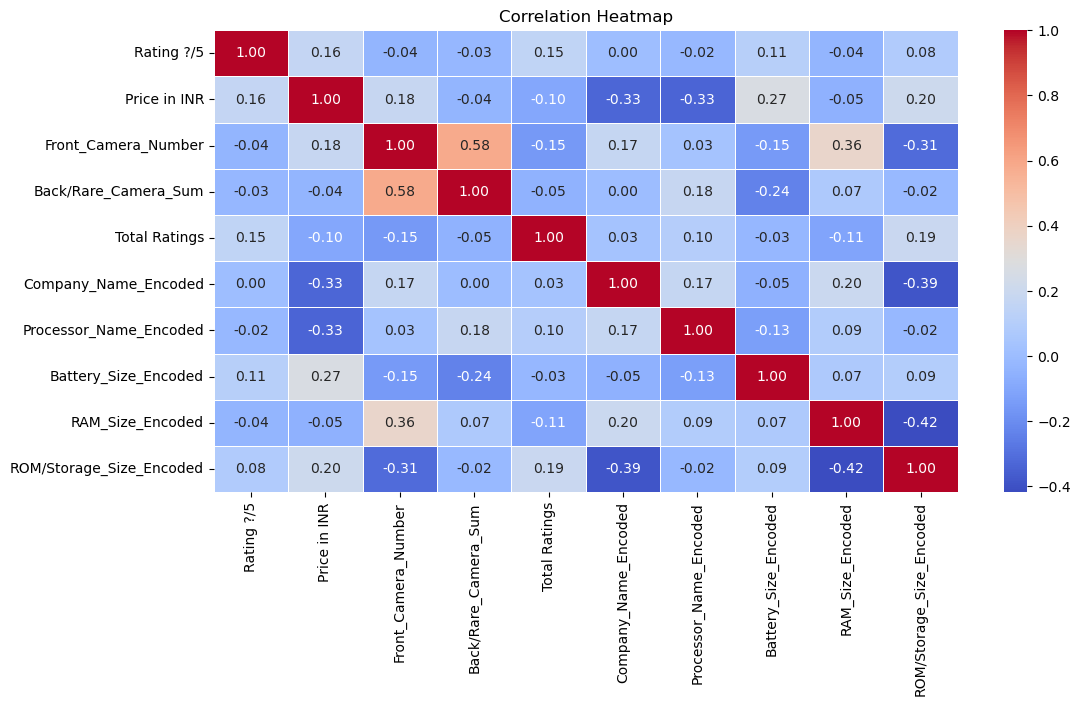

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# **Data Splitting**

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price in INR'])  # Features (independent variables)
y = df['Price in INR']  # Target variable (dependent variable)

# Split the dataset into a training set and a testing set (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1285, 9)
X_test shape: (551, 9)
y_train shape: (1285,)
y_test shape: (551,)


# **XGBOOST Regression Models**

In [26]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Use regression objective
    'eval_metric': 'mae'  # Evaluate based on Mean Absolute Error
}
# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds 
model = xgb.train(params, dtrain, num_rounds)
# Make predictions on the test set
y_pred = model.predict(dtest)
# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2353.44149165491
Mean Squared Error (MSE): 32665508.272532884
Root Mean Squared Error (RMSE): 5715.374727218932
R-squared (R2): 0.946517676823049


# **Decision Tree Regresson**

In [27]:
# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
# Transform the test data with the same imputer
X_test_imputed = imputer.transform(X_test)
# Create Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
# Train the model
dt_model.fit(X_train_imputed, y_train)
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_imputed)
# Calculate and print evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Model:")
print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R2):", r2_dt)

Decision Tree Model:
Mean Absolute Error (MAE): 2856.6786146400486
Mean Squared Error (MSE): 76542736.30690412
Root Mean Squared Error (RMSE): 8748.8705732171
R-squared (R2): 0.8746787184249571


# **RandomForestRegressor**

In [28]:
# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
# Transform the test data with the same imputer
X_test_imputed = imputer.transform(X_test)
# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)
# Train the model
rf_model.fit(X_train_imputed, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_imputed)
# Calculate and print evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Model:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


Random Forest Model:
Mean Absolute Error (MAE): 3023.628393119686
Mean Squared Error (MSE): 42515845.79020702
Root Mean Squared Error (RMSE): 6520.417608574394
R-squared (R2): 0.9303899946781098


## Finding Significant features

In [25]:
importances = model.get_score(importance_type='weight')
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
})
# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Display the top features
top_features = feature_importance_df.head(10) 
print("Top Features:")
print(top_features)


Top Features:
                    Feature  Importance
3             Total Ratings      1015.0
0                Rating ?/5       623.0
2      Back/Rare_Camera_Sum       531.0
1       Front_Camera_Number       425.0
7          RAM_Size_Encoded       354.0
5    Processor_Name_Encoded       323.0
4      Company_Name_Encoded       299.0
6      Battery_Size_Encoded       299.0
8  ROM/Storage_Size_Encoded       199.0


## Ratings has the most significant impact on price followed by camera